# Goal
Investigate top-paying roles and skills in the data science industry.
Use Python to explore a real-live dataset on job postings.
For job-seekers: use these insights to help find the best job opportunities.
# Final Deliverables:
Create Jupyter Notebookss (showcasing core skills in Python).
Create a summary page (via README.md) capturing your findings.
Share this project via GitHub & LinkedIn.
# Questions to Answer
What are the most demanded skills for the top 3 most popular data roles?
How are in-demand skills trending for Data Analysts?
How well do jobs and skills pay for Data Analysts?
What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

In [31]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Text(0.5, 1.0, 'Number of Jobs Per Job Title')

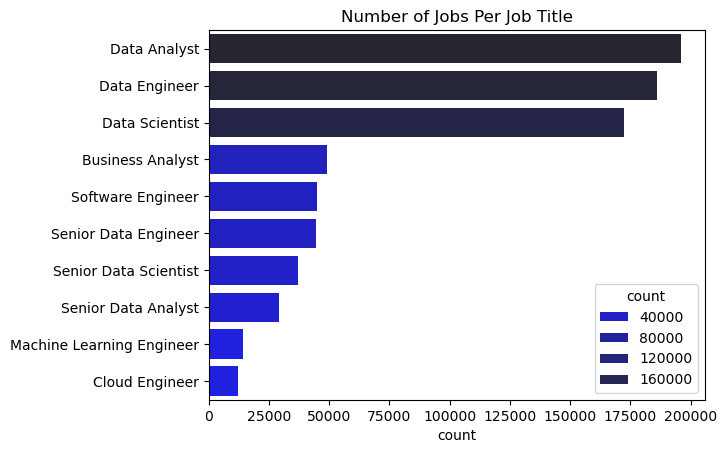

In [32]:
df_job_count = df['job_title_short'].value_counts().to_frame().copy()

df_job_count
sns.barplot(x = 'count', y='job_title_short',hue='count',data=df_job_count, palette='dark:b_r')
plt.show
plt.ylabel('')
plt.title('Number of Jobs Per Job Title')

Text(0.5, 1.0, 'Number of Jobs Per Country')

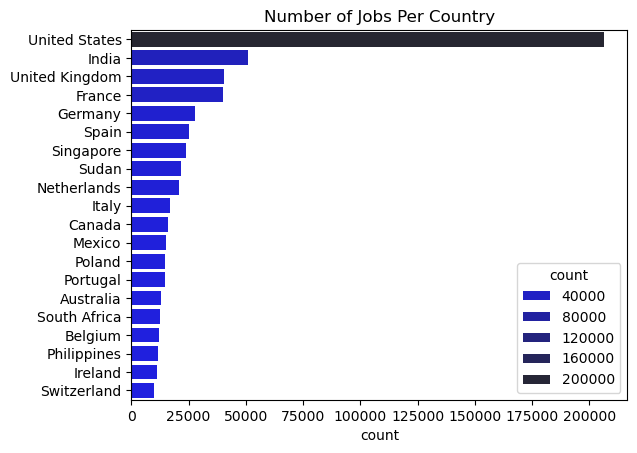

In [33]:
df_country_count = df['job_country'].value_counts().to_frame().copy()

df_country_count = df_country_count.head(20)
sns.barplot(x = 'count', y='job_country',hue='count',data=df_country_count, palette='dark:b_r')
plt.show
plt.ylabel('')
plt.title('Number of Jobs Per Country')

Text(0.5, 1.0, 'Number of Jobs Per Company')

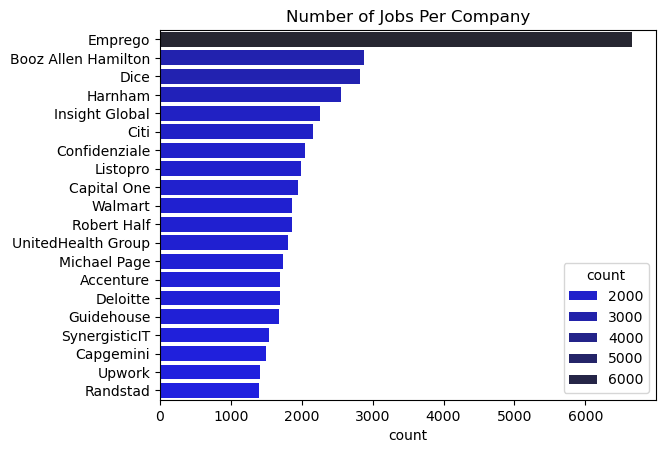

In [34]:
df_company_count = df['company_name'].value_counts().to_frame().copy()

df_company_count = df_company_count.head(20)
sns.barplot(x = 'count', y='company_name',hue='count',data=df_company_count, palette='dark:b_r')
plt.show
plt.ylabel('')
plt.title('Number of Jobs Per Company')

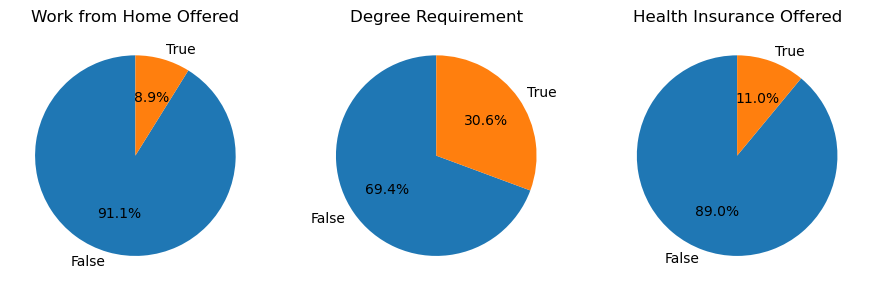

In [35]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, len(dict_column), figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


In [36]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']== 'United States')].copy()

df_DA_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67816 entries, 36 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        67816 non-null  object        
 1   job_title              67816 non-null  object        
 2   job_location           67582 non-null  object        
 3   job_via                67809 non-null  object        
 4   job_schedule_type      67107 non-null  object        
 5   job_work_from_home     67816 non-null  bool          
 6   search_location        67816 non-null  object        
 7   job_posted_date        67816 non-null  datetime64[ns]
 8   job_no_degree_mention  67816 non-null  bool          
 9   job_health_insurance   67816 non-null  bool          
 10  job_country            67816 non-null  object        
 11  salary_rate            8442 non-null   object        
 12  salary_year_avg        4350 non-null   float64       
 13  sala

In [57]:
df_DA_locations_for_plot = df_DA_US.groupby('job_location').size().reset_index(name='job_count')


In [62]:
df_DA_locations_for_plot = df_DA_locations_for_plot.sort_values(by='job_count', ascending=False).head(10)


Text(0.5, 1.0, 'Count of Data Analyst Postings by Location (USA)')

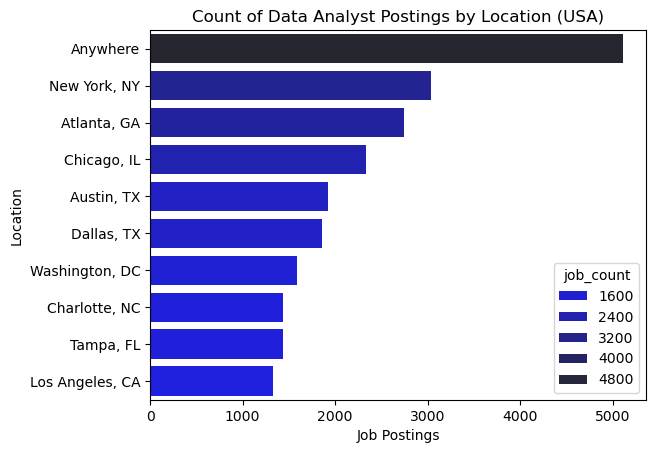

In [66]:
sns.barplot(x ='job_count', y= 'job_location', data=df_DA_locations_for_plot, hue='job_count', palette='dark:b_r')

plt.xlabel('Job Postings')
plt.ylabel('Location')
plt.title('Count of Data Analyst Postings by Location (USA)')

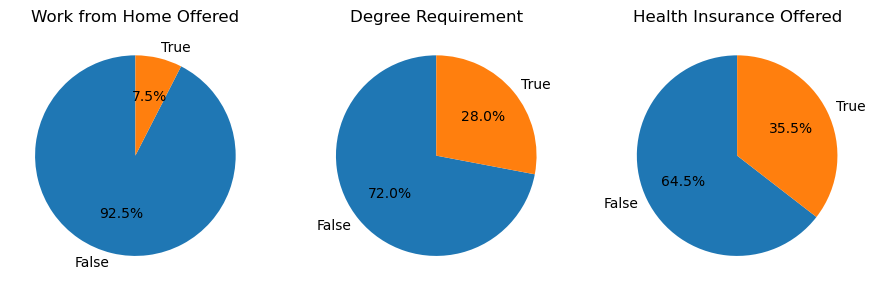

In [67]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, len(dict_column), figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


In [69]:
df_DA_US_companies = df_DA_US.groupby('company_name').size().reset_index(name='job_count')

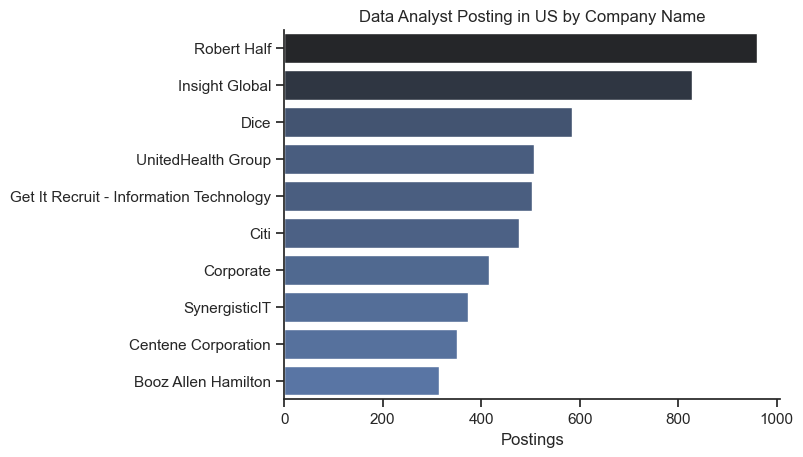

In [87]:
df_DA_US_companies = df_DA_US_companies.sort_values(by='job_count', ascending=False).head(10)

sns.barplot(data= df_DA_US_companies, x='job_count', y="company_name", hue='job_count', palette='dark:b_r', legend=False)
sns.despine()

plt.ylabel('')
plt.title('Data Analyst Posting in US by Company Name')
plt.xlabel('Postings')
plt.show()